# Variant Calling Workflow

Variant calling workflow from aligned sequencing reads to filtered VCF output using samtools, VarScan, and bcftools.

---

## 1. Data Preparation

In [ ]:
# Inspect SAM file header to verify sorting

!ls -lh ~/data/sample.sam
!ls -lh ~/data/sample.bam

total 54G
-rw-r--r--. 1 mrajan37 gtperson 3.1G Sep 30 20:31 hg38.fa
-rw-r--r--. 1 mrajan37 gtperson 7.0G Oct  1 16:02 hg38.mmi
-rw-r--r--. 1 mrajan37 gtperson  20G Oct  1 16:18 SRR702076.Minimap.sam
-rw-r--r--. 1 mrajan37 gtperson 3.4G Oct  1 19:14 SRR702076_Sorted.Minimap.bam
-rw-r--r--. 1 mrajan37 gtperson  20G Oct  1 19:04 SRR702076_Sorted.Minimap.sam


In [ ]:
#Show that your SAM file is sorted by genomic coordinates.

The first line (@HD) shows that the reads are sorted (SO) by their position in the genome.

In [ ]:
#To check the sorted file again.

In [ ]:
!head ~/data/sample_sorted.sam

@HD	VN:1.6	SO:coordinate
@SQ	SN:chr1	LN:248956422
@SQ	SN:chr10	LN:133797422
@SQ	SN:chr11	LN:135086622
@SQ	SN:chr11_KI270721v1_random	LN:100316
@SQ	SN:chr12	LN:133275309
@SQ	SN:chr13	LN:114364328
@SQ	SN:chr14	LN:107043718
@SQ	SN:chr14_GL000009v2_random	LN:201709
@SQ	SN:chr14_GL000225v1_random	LN:211173


### 1.1 The pieleup format

The pileup format is a way to show how DNA reads align with a reference genome. It displays the number of reads covering each position and any differences from the reference. This format helps identify possible genetic variations by providing a clear view of the data at each genomic location.

In [ ]:
The pileup format summarizes base calls at each genomic position and contains six primary columns:

1. Chromosome
2. Position
3. Reference base
4. Read depth
5. Read bases
6. Base qualities

### 1.2 Create the pileup file</h3>
Using samtools, create the pileup file for the SAM file of your 1000 genomes individuals

In [ ]:
#ommand for pileup here.

In [ ]:
!ls -ld ~/VariantCalling/

drwxr-xr-x. 2 mrajan37 gtperson 4096 Oct 10 22:16 /home/hice1/rgorrepati7/biol6150/ProjectSubmissions/Group2/Project3/scratch3/VariantCalling/


In [ ]:
!samtools mpileup -f ~/VariantCalling/hg38.fa ~/VariantCalling/SRR702076_Sorted.Minimap.bam > ~/VariantCalling/SRR702076_Sorted.Minimap.mpileup

[mpileup] 1 samples in 1 input files


In [ ]:
!ls -lh ~/VariantCalling/

total 16G
-rw-r--r--. 1 rgorrepati7 gtperson 16G Oct 10 23:16 SRR702076_Sorted.Minimap.mpileup


In [ ]:
#First 10 lines of the Pileup file.
#10,000 - 10,010 lines of the Pileup file.
#200,000 - 200,010 lines of the Pileup file.

In [ ]:
!head -n10 ~/VariantCalling/SRR702076_Sorted.Minimap.mpileup

chr1	11125	g	1	^!.	E
chr1	11126	a	1	.	J
chr1	11127	g	1	.	J
chr1	11128	a	1	.	I
chr1	11129	c	1	.	I
chr1	11130	g	1	.	H
chr1	11131	g	1	.	I
chr1	11132	g	1	.	I
chr1	11133	t	1	.	;
chr1	11134	a	1	.	E


In [ ]:
!head -n10010 ~/VariantCalling/SRR702076_Sorted.Minimap.mpileup | tail -n11

chr1	51537	A	1	.	J
chr1	51538	G	1	.	J
chr1	51539	T	1	.	F
chr1	51540	G	1	.	H
chr1	51541	T	1	.	H
chr1	51542	G	1	.	H
chr1	51543	T	1	.	D
chr1	51544	G	1	.	H
chr1	51545	A	1	.	I
chr1	51546	T	1	.	G
chr1	51547	T	1	.	I


In [ ]:
!head -n200010 ~/VariantCalling/SRR702076_Sorted.Minimap.mpileup | tail -n11

chr1	1299963	A	41	........,.,...,,,..,,.,..,....,,...,,..,,	C3DDDDDDGDJCCDJJHDDHJJHIJFAIJJDDJJGCDJJDD
chr1	1299964	A	43	.........,.,...,,,..,,.,..,....,,...,,..,,^B.	D3DDD3C?DIDJDDDJJFDDGJJHIIFGIJJDDJJICAJJDD>
chr1	1299965	A	43	.........,.,...,,,..,,.,..,....,,...,,..,,.	D8DDD2BBAGDJDDDIJGDDHIHHJJFFJJJDDJJJCDIJDD>
chr1	1299966	G	42	.$.......,.,...,,,..,,.,..,....,,...,,..,,.	>3DCDA<DHDJDDCJIGDDIHHJJHH@GGJCDIIGDDHHCDI
chr1	1299967	G	42	.$.$.$.$...,.,...,,,..,,.,..,....,,...,,..,,.^B.	<BBB<CDGDIDD?JJIDCGHEIJJHAIIJADJJICDJJDCJE
chr1	1299968	C	40	.$...,.,...,,,..,,.,..,....,,...,,..,,..^0.	8ABBFDIDDBJJHDDIGHIGIHCIIGEEJIFBDGJBBJBE
chr1	1299969	T	37	...,.,...,,,..,,.,..,....,,...,,.,,..	CDD@DHDDDIIGDDIHHHEJECIIICCJJJDDIDCJJ
chr1	1299970	C	41	...,.,...,,,..,,.,..,....,,...,,..,,...^G.^%.	DDDGDHDDDHHFDDHGFDHGAEJIIAAIJIDBI?B?J<JEE
chr1	1299971	A	41	...,.,...,,,..,,.,..,....,,...,,..,,.....	DDDEDGCDCDD@DDA@F;HH;HJII9>IJJC>IF;9JFJJJ
chr1	1299972	C	41	.$..,.,...,,,..,,.,..,....,,..,,..,,.....^N.	>

### 1.3 Look more into the pileup file

Show the 100,000th entry in your pileup file and explain

In [ ]:
#Show the 100,000th entry here.

In [ ]:
!sed -n '100000p' ~/VariantCalling/SRR702076_Sorted.Minimap.mpileup

chr1	970775	C	46	.,,,,,.,,,,.,,,,,,,,,,,.,,,,,...,,,,,..,...,,,	DHIHIJDJGGJDJAIJIAGB@H?HFFFFDJJJDDBDBJJBJJJDDD


In [ ]:
#Explain the entry here.

Column 5 (.,,,,,.,,,,.,,,,,,,,,,,.,,,,,...,,,,,..,...,,,) represents the base calls at position 970775 on chr1. The symbols . and , indicate matches to the reference base C on the forward and reverse strands, respectively. This shows the alignment of reads at this position and whether they match or differ from the reference genome.

### 1.4 Plot the read count distribution

A graph that shows how many reads are aligning to a specific genomic region could be helpful for determining flags for our variant caller. 
Plot a graph (thin bars or line) between Read Count (y-axis) and Position (x-axis) only for chromosome 20
You can use Python for visualization, but will have to filter the pileup file using bash or python.

In [ ]:
#An awk command can help you create a file with just the information for chr20.

In [ ]:
!awk '$1 == "chr20"' ~/VariantCalling/SRR702076_Sorted.Minimap.mpileup > ~/VariantCalling/chr20_pileup.txt

In [ ]:
#Plot your graph and show it here (matplotlib/seaborn)

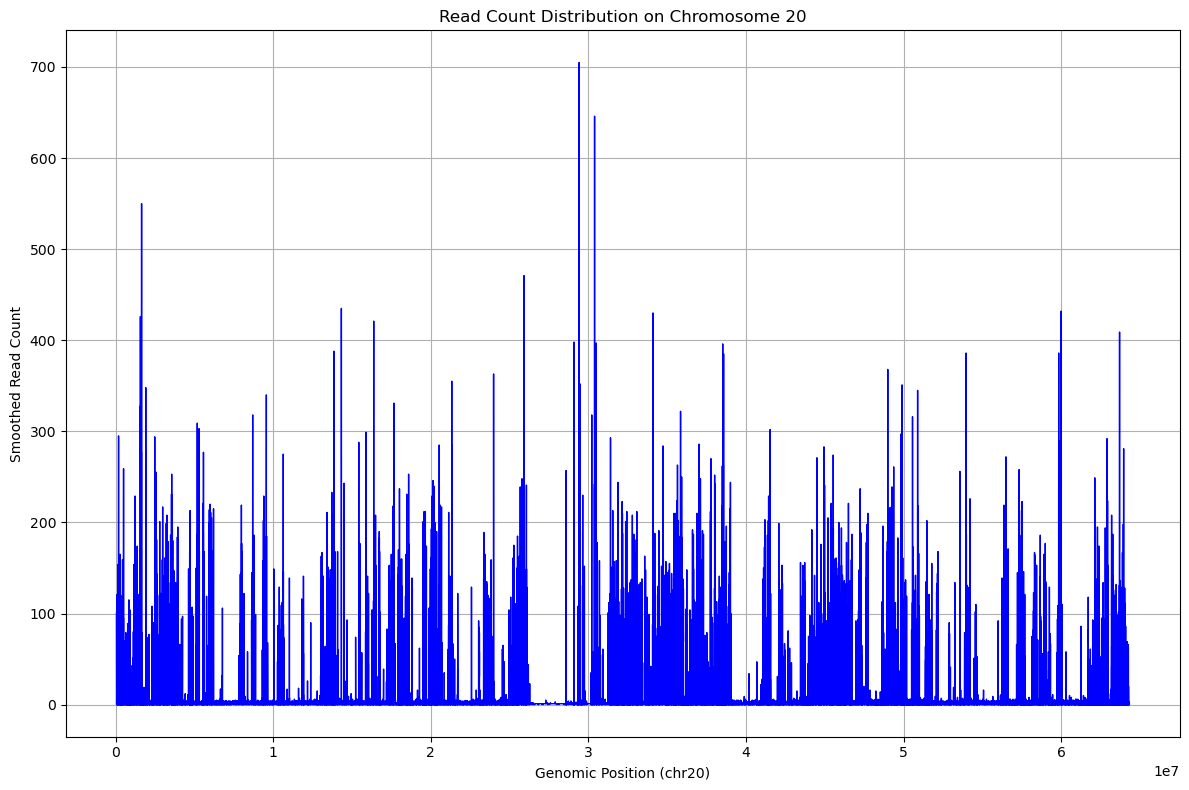

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")

# Load the data
chr20_pileup_file = '~/biol6150/ProjectSubmissions/Group2/Project3/scratch3/VariantCalling/chr20_pileup.txt'
chr20_data = pd.read_csv(chr20_pileup_file, sep='\t', names=['Chromosome', 'Position', 'Ref', 'Read_Count', 'Read_Results', 'Base_Qualities'])

chr20_data['Smoothed_Read_Count'] = chr20_data['Read_Count']

plt.figure(figsize=(12, 8))
sns.lineplot(data=chr20_data, x='Position', y='Smoothed_Read_Count', lw=1, color='blue')

plt.title('Read Count Distribution on Chromosome 20')
plt.xlabel('Genomic Position (chr20)')
plt.ylabel('Smoothed Read Count')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# **2. Variant calling**

---

### 2.1 Call the variants (SNPs and Short Indels)  

2.1.1 Write the command used and justify the flags you have used using one sentence.  
2.1.2 Informed decision.

In [ ]:
#Use VarScan for calling variants. Look up the appropriate command for this.

In [ ]:
!varscan

VarScan v2.4.6

***NON-COMMERCIAL VERSION***

USAGE: java -jar VarScan.jar [COMMAND] [OPTIONS] 

COMMANDS:
	pileup2snp		Identify SNPs from a pileup file
	pileup2indel		Identify indels a pileup file
	pileup2cns		Call consensus and variants from a pileup file
	mpileup2snp		Identify SNPs from an mpileup file
	mpileup2indel		Identify indels an mpileup file
	mpileup2cns		Call consensus and variants from an mpileup file

	somatic			Call germline/somatic variants from tumor-normal pileups
	mpileup2somatic		Call germline/somatic variants in multi-tumor-normal mpileup (beta feature in v2.4.5)
	copynumber		Determine relative tumor copy number from tumor-normal pileups
	readcounts		Obtain read counts for a list of variants from a pileup file

	filter			Filter SNPs by coverage, frequency, p-value, etc.
	somaticFilter		Filter somatic variants for clusters/indels
	fpfilter		Apply the false-positive filter

	processSomatic		Isolate Germline/LOH/Somatic calls from output
	copyCaller		GC-adjust and pro

In [ ]:
#Make an informed decision (based on section 1) about the parameters used for calling the variants.
#There is no specific answer to this, but the idea is to look into the flags used, and make sure they make sense.

In [ ]:
!varscan mpileup2cns ~/VariantCalling/SRR702076_Sorted.Minimap.mpileup --min-coverage 10 --variants 1 --min-var-freq 0.1 --output-vcf > ~/VariantCalling/SRR702076.vcf

Only variants will be reported
Min coverage:	10
Min reads2:	2
Min var freq:	0.1
Min avg qual:	15
P-value thresh:	0.01
Reading input from /home/hice1/rgorrepati7/biol6150/ProjectSubmissions/Group2/Project3/VariantCalling/SRR702076_Sorted.Minimap.mpileup
340443059 bases in pileup file
66697 variant positions (62115 SNP, 4582 indel)
4433 were failed by the strand-filter
62264 variant positions reported (57853 SNP, 4411 indel)


Justification for the command-

1.min-coverage 10: Ensures that only positions with at least 10 reads are considered, reducing the likelihood of false positives due to low coverage.

2.variants 1: Outputs only variant positions (SNPs and indels) as required in the question.

3.min-var-freq 0.1: Filters variants to include only those with a minimum allele frequency of 10%, reducing noise from rare, potentially erroneous variants.

4.⁠ ⁠output-vcf: Outputs the variant calls in VCF format, which is the standard for variant data storage and sharing.

In [ ]:
!head -n 40 ~/VariantCalling/SRR702076.vcf 

##fileformat=VCFv4.3
##source=VarScan2
##INFO=<ID=ADP,Number=1,Type=Integer,Description="Average per-sample depth of bases with Phred score >= 15">
##INFO=<ID=WT,Number=1,Type=Integer,Description="Number of samples called reference (wild-type)">
##INFO=<ID=HET,Number=1,Type=Integer,Description="Number of samples called heterozygous-variant">
##INFO=<ID=HOM,Number=1,Type=Integer,Description="Number of samples called homozygous-variant">
##INFO=<ID=NC,Number=1,Type=Integer,Description="Number of samples not called">
##FILTER=<ID=str10,Description="Less than 10% or more than 90% of variant supporting reads on one strand">
##FILTER=<ID=indelError,Description="Likely artifact due to indel reads at this position">
##FORMAT=<ID=GT,Number=1,Type=String,Description="Genotype">
##FORMAT=<ID=GQ,Number=1,Type=Integer,Description="Genotype Quality">
##FORMAT=<ID=SDP,Number=1,Type=Integer,Description="Raw Read Depth as reported by SAMtools">
##FORMAT=<ID=DP,Number=1,Type=Integer,Description="Quality

### 2.2 Select any random variant in your VCF file which lies between the positions 20,800,000 and 30,800,000 on chromosome 16

What is the average depth of bases for this variant called on chromosome 16

In [ ]:
#Extract this variant. There are multiple ways of doing this. Some fast and some easy.

In [ ]:
#There could be multiple variants in this range, please select one.

In [ ]:
!grep -w "chr16" ~/VariantCalling/SRR702076.vcf | awk '$2 >= 20800000 && $2 <= 30800000'

chr16	20800359	.	C	T	.	PASS	ADP=91;WT=0;HET=1;HOM=0;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	0/1:127:91:91:55:36:39.56%:1.8907E-13:37:35:21:34:16:20
chr16	20843987	.	A	G	.	PASS	ADP=62;WT=0;HET=0;HOM=1;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	1/1:255:62:62:0:62:100%:6.5755E-37:0:38:0:0:30:32
chr16	20845379	.	T	TCTC	.	PASS	ADP=16;WT=0;HET=0;HOM=1;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	1/1:57:16:16:3:13:81.25%:1.6121E-6:26:22:0:3:2:11
chr16	20915783	.	C	T	.	PASS	ADP=15;WT=0;HET=1;HOM=0;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	0/1:29:15:15:7:8:53.33%:1.0995E-3:37:34:0:7:0:8
chr16	20955009	.	G	A	.	PASS	ADP=62;WT=0;HET=1;HOM=0;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	0/1:115:62:62:31:31:50%:2.9394E-12:36:38:14:17:9:22
chr16	20975184	.	C	T	.	PASS	ADP=47;WT=0;HET=1;HOM=0;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	0/1:94:47:47:22:25:53.19%:3.621E-10:39:38:17:5:23:2
chr16	20997368	.	T	C	.	PASS	A

In [ ]:
#The information is there in your VCF file.

In [ ]:
!grep -w "chr16" ~/VariantCalling/SRR702076.vcf | awk '$2 == 21125156' | cut -f8

ADP=25;WT=0;HET=0;HOM=1;NC=0


The ADP=25 means that the average depth of bases for this variant is 25.

### 2.3 How many indels do you have in your VCF file?

In [ ]:
#Same as above, there are multiple ways of doing this.

In [ ]:
#Write your command and show the number of indels.

In [ ]:
!grep -v "^#" ~/VariantCalling/SRR702076.vcf | awk 'length($4) != length($5)' | wc -l

4411


The total number of indels present are 4411

### 2.4 Select any random variant in your VCF file which lies between the position 203,000,000 and 230,000,000 on chromosome 2.


2.4.1 What is the variation observed for your 1000 genome individual at this position? Is it 0/0 1/1/ 0/1 or 1/0? How many copies of reference alleles does your individual carry at this position?

2.4.2 How many read bases (forward and reverse) from your pileup file (as selected by VarScan) supported the alternative allele and how many variants supported the reference allele at this position?

In [ ]:
#Variation observed and number of copies for reference allele.

In [ ]:
!grep -w "chr2" ~/VariantCalling/SRR702076.vcf | awk '$2 >= 203000000 && $2 <= 230000000'

chr2	203056547	.	A	G	.	PASS	ADP=93;WT=0;HET=0;HOM=1;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	1/1:255:93:93:0:93:100%:1.7451E-55:0:38:0:0:28:65
chr2	203126765	.	A	G	.	PASS	ADP=39;WT=0;HET=0;HOM=1;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	1/1:224:39:39:0:39:100%:3.6742E-23:0:39:0:0:15:24
chr2	203132147	.	A	G	.	PASS	ADP=54;WT=0;HET=0;HOM=1;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	1/1:255:54:54:0:54:100%:4.0229E-32:0:37:0:0:6:48
chr2	203138086	.	A	C	.	PASS	ADP=63;WT=0;HET=0;HOM=1;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	1/1:255:63:63:0:63:100%:1.657E-37:0:39:0:0:55:8
chr2	203197338	.	A	G	.	PASS	ADP=75;WT=0;HET=0;HOM=1;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	1/1:255:75:75:0:75:100%:1.0773E-44:0:38:0:0:41:34
chr2	203202545	.	A	G	.	PASS	ADP=14;WT=0;HET=0;HOM=1;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	1/1:76:14:14:0:14:100%:2.4927E-8:0:36:0:0:13:1
chr2	203246675	.	GTTAA	G	.	PASS	ADP=11;WT=0;HE

In [ ]:
#Select the variant.

In [ ]:
!grep -w "chr2" ~/VariantCalling/SRR702076.vcf | awk '$2 ==203056547'

chr2	203056547	.	A	G	.	PASS	ADP=93;WT=0;HET=0;HOM=1;NC=0	GT:GQ:SDP:DP:RD:AD:FREQ:PVAL:RBQ:ABQ:RDF:RDR:ADF:ADR	1/1:255:93:93:0:93:100%:1.7451E-55:0:38:0:0:28:65


In [ ]:
#Number of reads supporting the ref & alt allele.

2.4.1: The variation is an A to G SNP. It is a 1/1. The individual carries 1 copy of the reference allele.

2.4.2: RD is reference depth and AD is alternative depth. 0 reads supported the reference allele while 93 reads supported the alternative allele.

# **3. Filtering**



---

### 3.1 Extract variants that have average per sample depth of > 50.

Show your command and number of variants before and after

In [ ]:
#before
!grep -v '^#' ~/VariantCalling/SRR702076.vcf| wc -l

62264


In [ ]:
!bcftools view -i 'FORMAT/DP>50' ~/VariantCalling/SRR702076.vcf -o ~/VariantCalling/SRR702076.filtered.vcf

[W::vcf_parse] Contig 'chr1' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'chr10' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'chr11' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'chr11_KI270721v1_random' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'chr12' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'chr13' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'chr14' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'chr14_GL000225v1_random' is not defined in the header. (Quick workaround: index the file with tabix.)
[W::vcf_parse] Contig 'chr14_KI270722v1_random' is not defined in the header. (Quick workaround: index the fi

In [ ]:
#after 
!grep -v "^#" ~/VariantCalling/SRR702076.filtered.vcf| wc -l

19718
